In [1]:
import sys
sys.path.append(".")

import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from Models import MnistClassifier
from Datasets import ImageDataset
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
%reload_ext autoreload
%autoreload 2

# Pytorch' NN

## Linear regression with one variable 

In [3]:
data = scipy.io.loadmat('ex3data1.mat')
X, Y = data['X'], data['y'].squeeze()
Y = np.array([0 if digit == 10 else digit for digit in Y])
Y

array([0, 0, 0, ..., 9, 9, 9])

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=7)

Datasets

In [5]:
train_ds = ImageDataset(features=X_train, dims=(20,20), y=Y_train, normalize=False)
test_ds = ImageDataset(features=X_test, dims=(20,20), y=Y_test, normalize=False)

In [6]:
for i in range(5):
    x, y = train_ds[i]
    print(f'X: {x[:3]}, Y: {y}')

X: tensor([0., 0., 0.], dtype=torch.float64), Y: 5
X: tensor([0., 0., 0.], dtype=torch.float64), Y: 3
X: tensor([0., 0., 0.], dtype=torch.float64), Y: 8
X: tensor([0., 0., 0.], dtype=torch.float64), Y: 7
X: tensor([0., 0., 0.], dtype=torch.float64), Y: 9


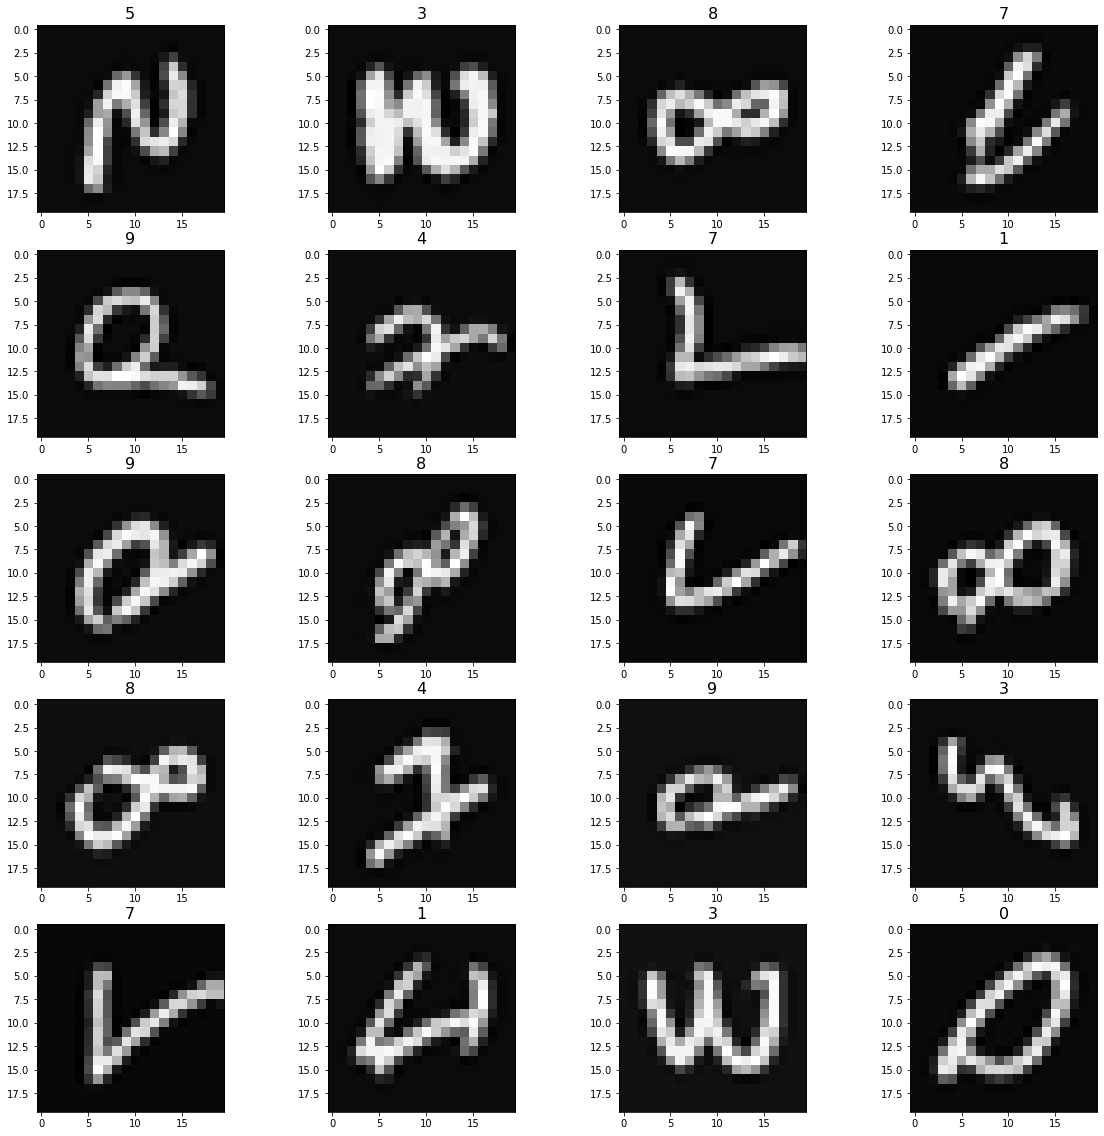

In [7]:
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = np.asarray(axes.ravel())
for i in range(20):
    img_pixels = train_ds.get_item_reshaped(i)
    _, y = train_ds[i]
    label = y.item()
    
    axes[i].set_title(label, fontsize=16)
    axes[i].imshow(img_pixels, cmap='gray')
plt.show()

Dataloders

In [8]:
train_dl = DataLoader(train_ds, batch_size=200)
test_dl = DataLoader(test_ds, batch_size=200)

In [9]:
for x, y in train_dl:
    print(f'{x.shape}, {y.shape}')

torch.Size([200, 400]), torch.Size([200])
torch.Size([200, 400]), torch.Size([200])
torch.Size([200, 400]), torch.Size([200])
torch.Size([200, 400]), torch.Size([200])
torch.Size([200, 400]), torch.Size([200])
torch.Size([200, 400]), torch.Size([200])
torch.Size([200, 400]), torch.Size([200])
torch.Size([200, 400]), torch.Size([200])
torch.Size([200, 400]), torch.Size([200])
torch.Size([200, 400]), torch.Size([200])
torch.Size([200, 400]), torch.Size([200])
torch.Size([200, 400]), torch.Size([200])
torch.Size([200, 400]), torch.Size([200])
torch.Size([200, 400]), torch.Size([200])
torch.Size([200, 400]), torch.Size([200])
torch.Size([200, 400]), torch.Size([200])
torch.Size([200, 400]), torch.Size([200])
torch.Size([200, 400]), torch.Size([200])
torch.Size([200, 400]), torch.Size([200])
torch.Size([200, 400]), torch.Size([200])


### NN Model Class

In [10]:
torch.set_default_dtype(torch.double)

### Training the net

In [11]:
model = MnistClassifier(400, 10)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
celoss_fn = nn.CrossEntropyLoss(reduction='mean')
epochs=100

In [12]:
model

MnistClassifier(
  (layer1): Sequential(
    (0): Linear(in_features=400, out_features=256, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=256, out_features=64, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (output): Sequential(
    (0): Linear(in_features=64, out_features=10, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Softmax(dim=1)
  )
)

In [13]:
losses = model.fit(train_dl=train_dl, epochs=epochs, loss_fn=celoss_fn, opt=optimizer)

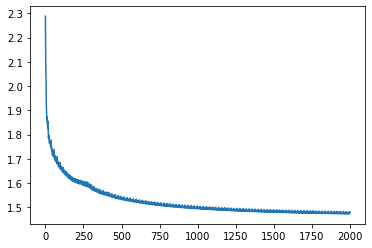

In [14]:
plt.plot(range(len(losses)), losses)

In [15]:
x_train, y_train = train_ds.reverse_transform()

In [16]:
x_test, y_test = test_ds.reverse_transform()

### Validating the net

In [17]:
y_train_pred = model.predict(train_dl).numpy().squeeze()

In [18]:
y_test_pred = model.predict(test_dl).numpy().squeeze()

In [19]:
accuracy_train = accuracy_score(y_train, y_train_pred.argmax(axis=1))
print(f'Accuracy in training: {accuracy_train}')

Accuracy in training: 0.9975


In [20]:
accuracy_test = accuracy_score(y_test, y_test_pred.argmax(axis=1))
print(f'Accuracy in testing: {accuracy_test}')

Accuracy in testing: 0.955


### Showing training classifications

In [21]:
equals = np.equal(y_train, y_train_pred.argmax(axis=1))
missclassified_indexes = np.where(equals == False)[0]
wellclassified_indexes = (np.where(equals == True)[0])[:18]

#### Missclassified samples

In [22]:
len(missclassified_indexes)

10

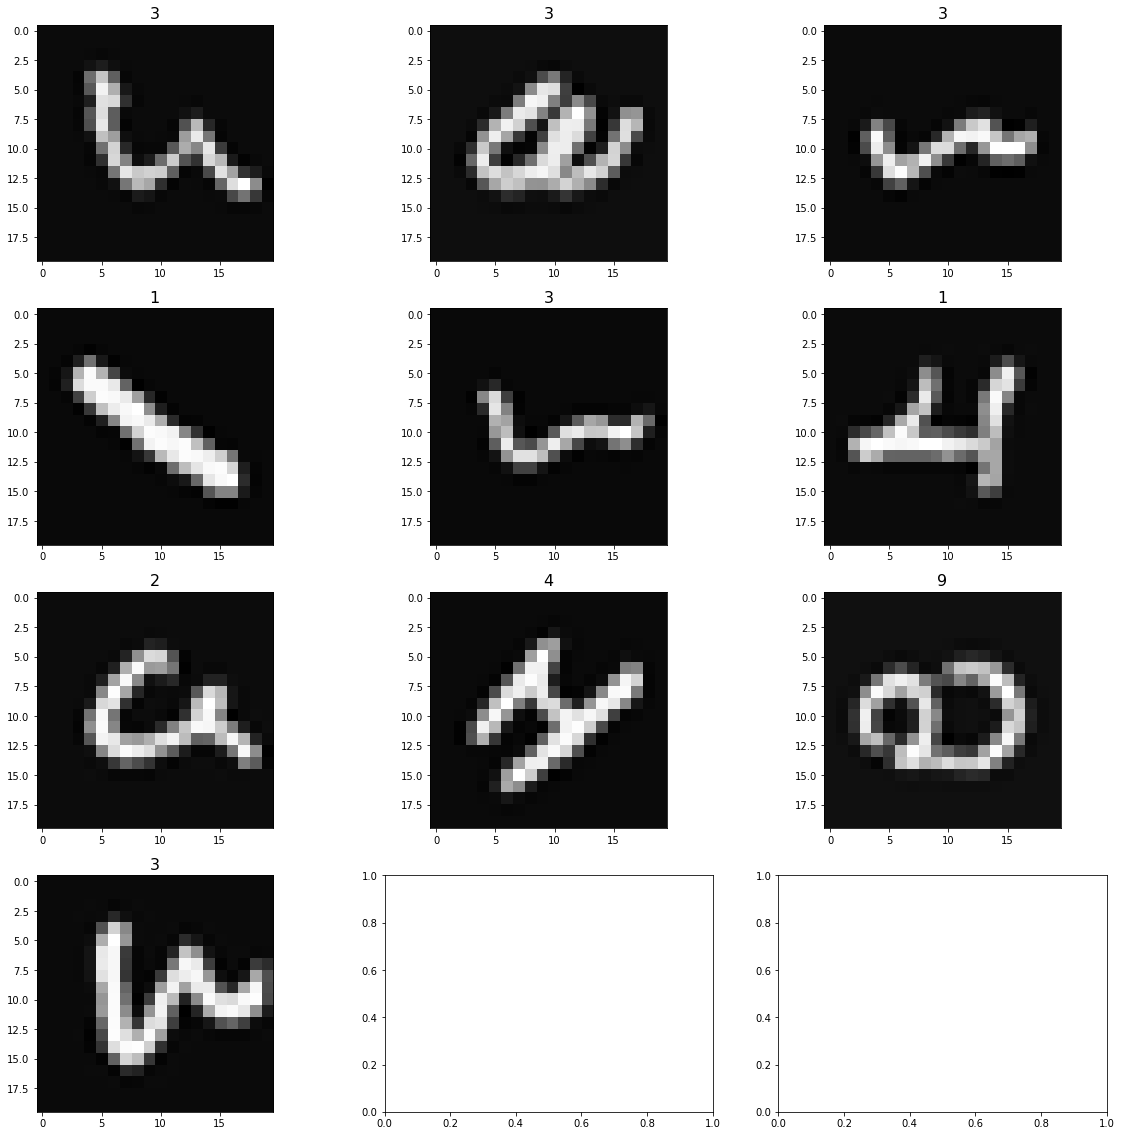

In [23]:
rows = len(missclassified_indexes)//3 if len(missclassified_indexes)%3==0 else len(missclassified_indexes)//3+1
fig, axes = plt.subplots(rows, 3, figsize=(20, 20))
axes = np.asarray(axes.ravel())
for i, idx in enumerate(missclassified_indexes):
    img_pixels = train_ds.get_item_reshaped(idx)
    _, y = train_ds[idx]
    label = y.item()
    
    axes[i].set_title(label, fontsize=16)
    axes[i].imshow(img_pixels, cmap='gray')
plt.show()

#### Wellclassified samples

In [24]:
len(wellclassified_indexes)

18

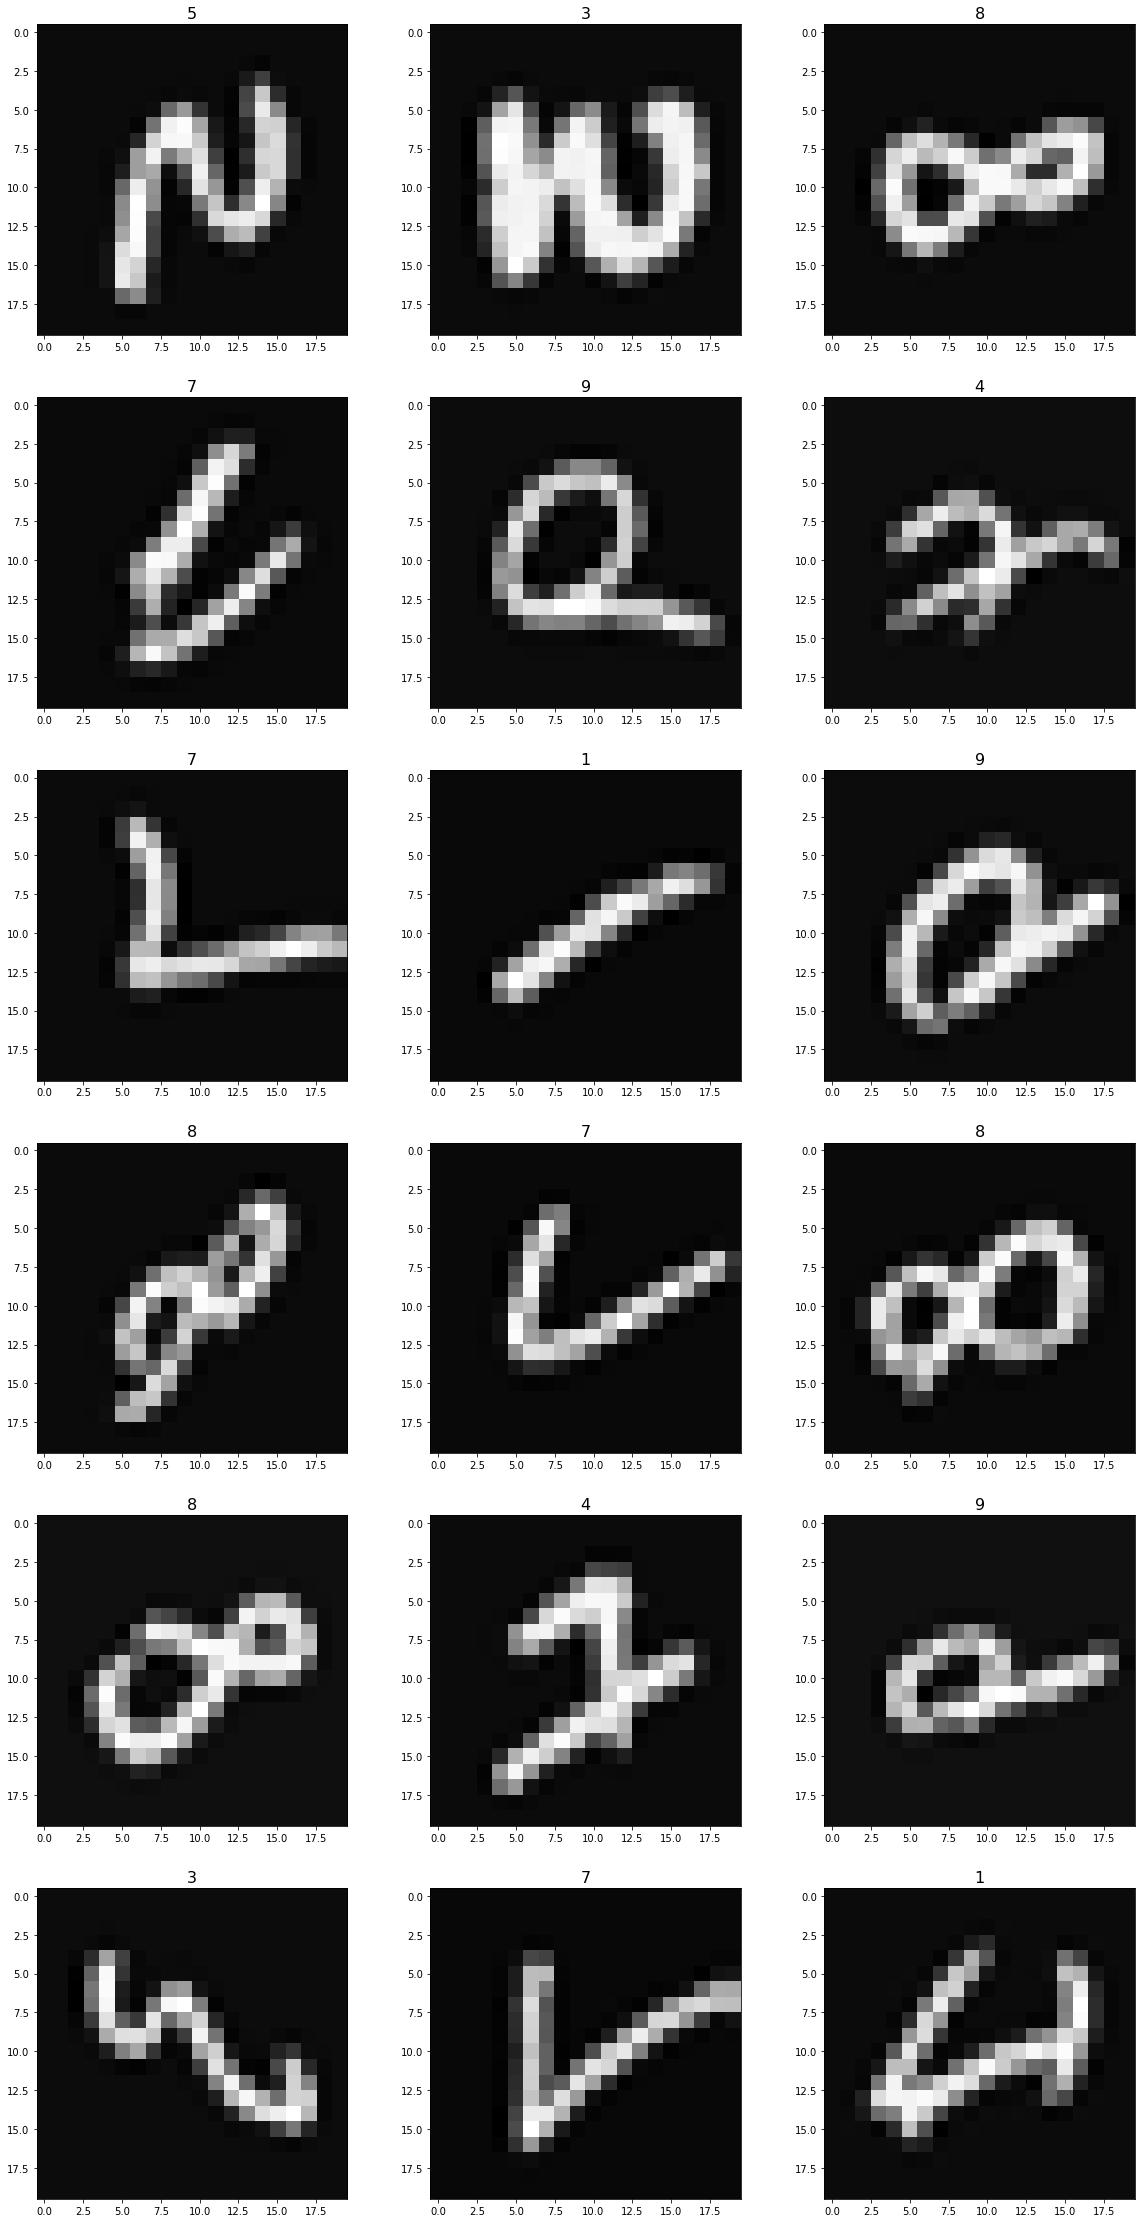

In [25]:
rows = len(wellclassified_indexes)//3 if len(wellclassified_indexes)%3==0 else len(wellclassified_indexes)//3+1
fig, axes = plt.subplots(rows, 3, figsize=(20, 40))
axes = np.asarray(axes.ravel())
for i, idx in enumerate(wellclassified_indexes):
    img_pixels = train_ds.get_item_reshaped(idx)
    _, y = train_ds[idx]
    label = y.item()
    
    axes[i].set_title(label, fontsize=16)
    axes[i].imshow(img_pixels, cmap='gray')
plt.show()

### Showing testing classifications

In [26]:
equals = np.equal(y_test, y_test_pred.argmax(axis=1))
missclassified_indexes = np.where(equals == False)[0]
wellclassified_indexes = (np.where(equals == True)[0])[:18]

#### Missclassified samples

In [27]:
len(missclassified_indexes)

45

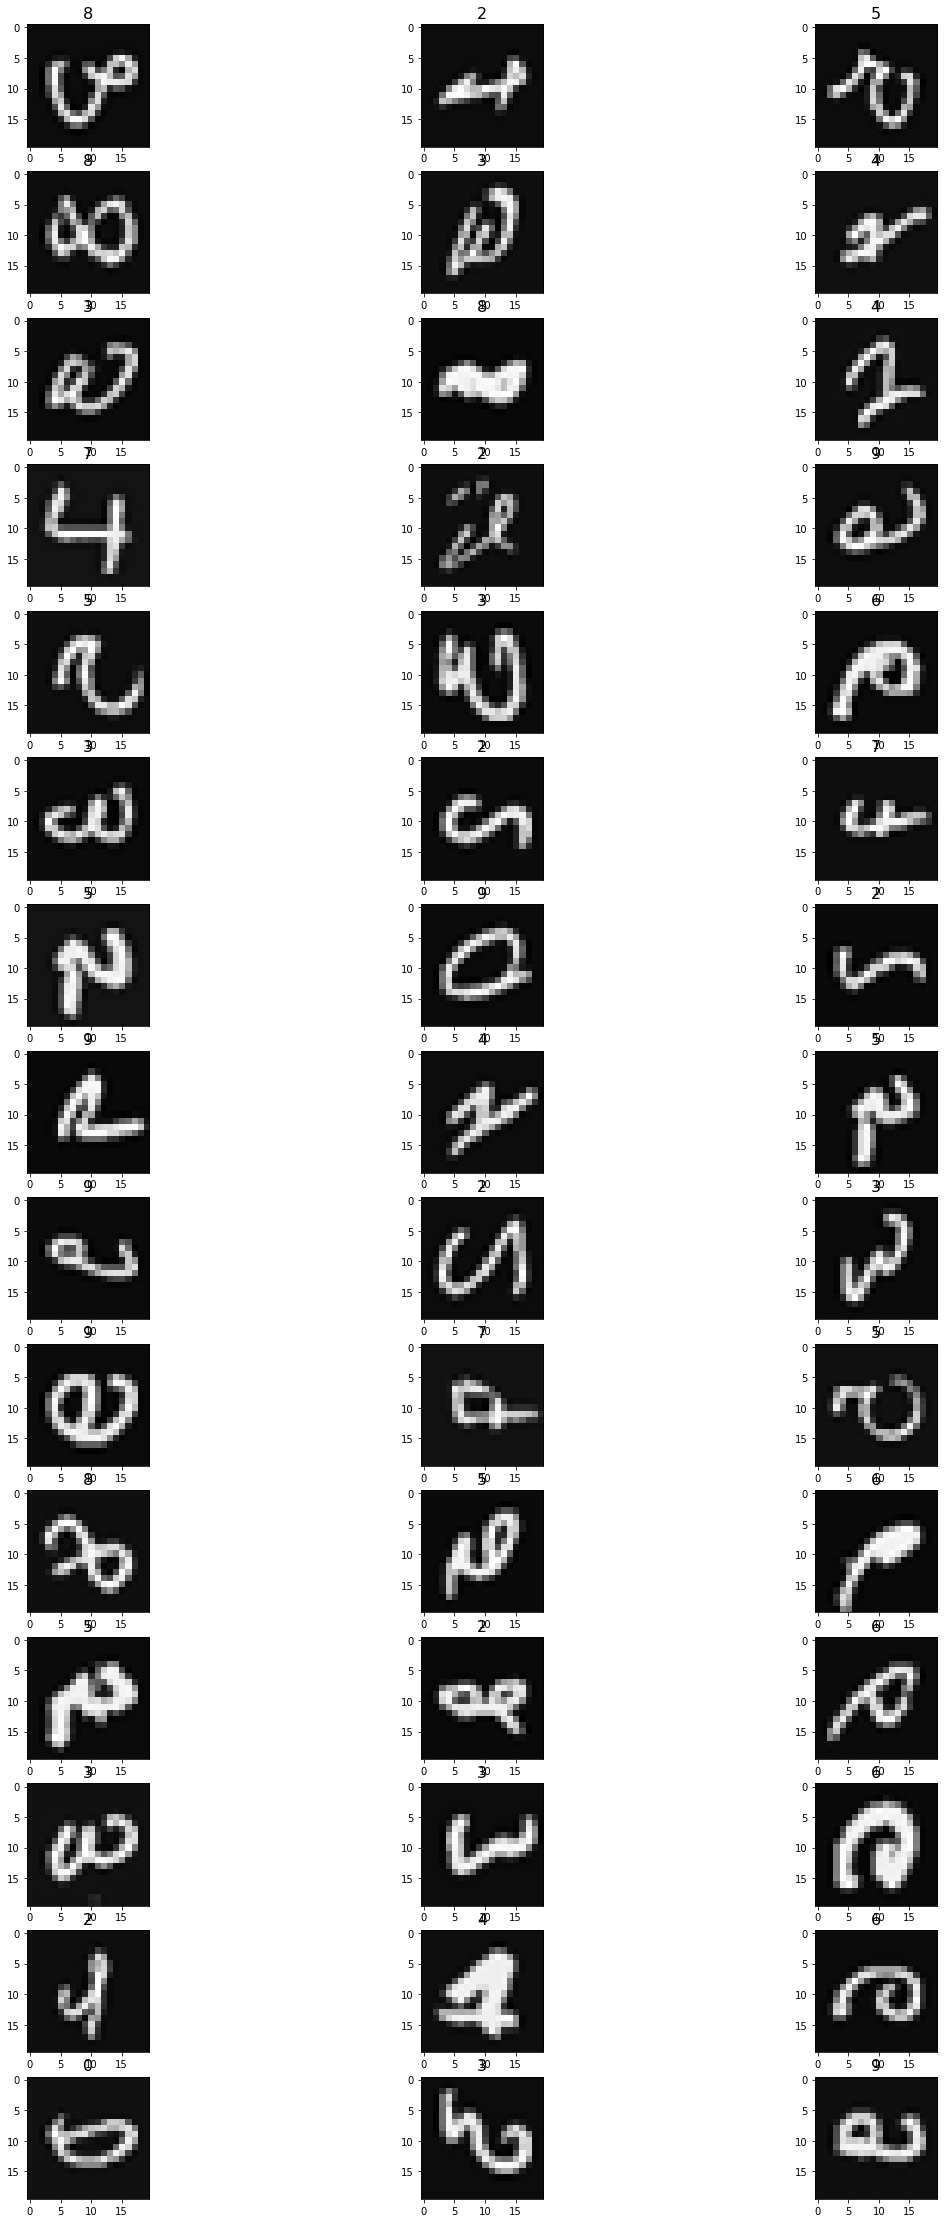

In [28]:
rows = len(missclassified_indexes)//3 if len(missclassified_indexes)%3==0 else len(missclassified_indexes)//3+1
fig, axes = plt.subplots(rows, 3, figsize=(20, 40))
axes = np.asarray(axes.ravel())
for i, idx in enumerate(missclassified_indexes):
    img_pixels = test_ds.get_item_reshaped(idx)
    _, y = test_ds[idx]
    label = y.item()
    
    axes[i].set_title(label, fontsize=16)
    axes[i].imshow(img_pixels, cmap='gray')
plt.show()

#### Wellclassified samples

In [29]:
len(wellclassified_indexes)

18

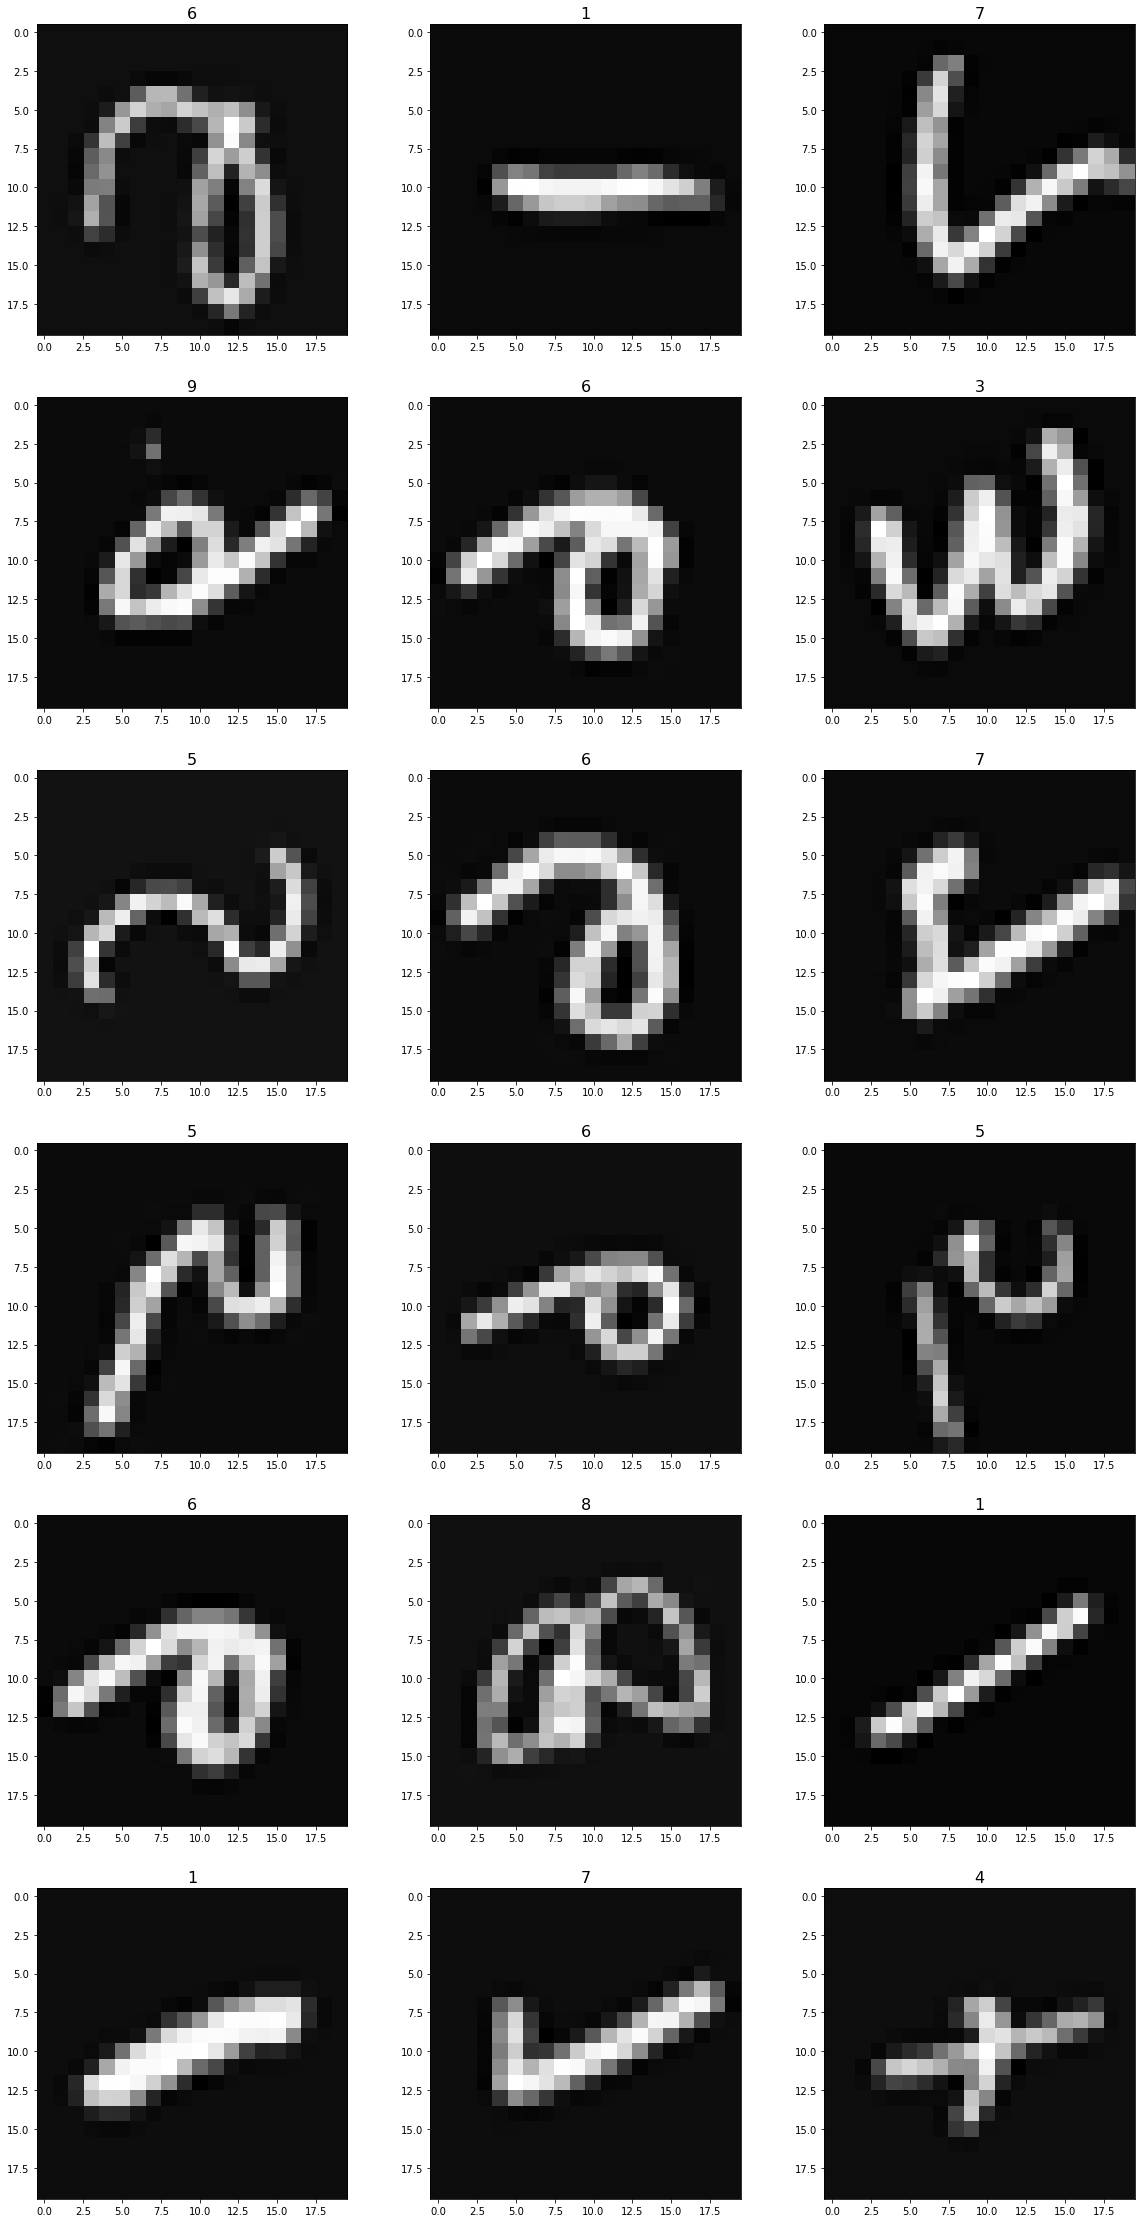

In [30]:
rows = len(wellclassified_indexes)//3 if len(wellclassified_indexes)%3==0 else len(wellclassified_indexes)//3+1
fig, axes = plt.subplots(rows, 3, figsize=(20, 40))
axes = np.asarray(axes.ravel())
for i, idx in enumerate(wellclassified_indexes):
    img_pixels = test_ds.get_item_reshaped(idx)
    _, y = test_ds[idx]
    label = y.item()
    
    axes[i].set_title(label, fontsize=16)
    axes[i].imshow(img_pixels, cmap='gray')
plt.show()